In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
%matplotlib inline

In [2]:
df = pd.read_csv('/Users/wickedbear/Coding/Projects/Spread_Series/CSVs/daily_spread.csv')

In [3]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

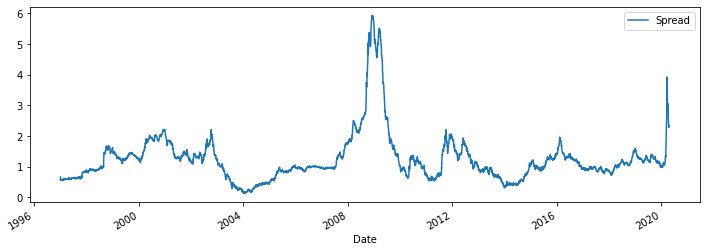

In [4]:
df.plot(figsize = (12, 4))

In [5]:
# Import the ARMA module from statsmodels
from statsmodels.tsa.arima_model import ARMA
import statsmodels.api as sm

# Fit an AR(1) model
mod_arma = ARMA(df, order=(1,0))
res_arma = mod_arma.fit()

# Print out summary information on the fit
print(res_arma.summary())

# Print out the estimate for the constant and for theta
print(res_arma.params)

                              ARMA Model Results                              
Dep. Variable:                 Spread   No. Observations:                 5821
Model:                     ARMA(1, 0)   Log Likelihood               11977.471
Method:                       css-mle   S.D. of innovations              0.031
Date:                Mon, 06 Jul 2020   AIC                         -23948.942
Time:                        19:54:05   BIC                         -23928.935
Sample:                             0   HQIC                        -23941.984
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            1.3195      0.477      2.764      0.006       0.384       2.255
ar.L1.Spread     0.9993      0.000   2264.283      0.000       0.998       1.000
                                    Roots   

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [6]:
forecasted = res_arma.predict()
forecasted

Date
1996-12-31    1.319496
1997-01-02    0.660459
1997-01-03    0.560529
1997-01-06    0.570522
1997-01-07    0.570522
                ...   
2020-04-14    2.379262
2020-04-15    2.279331
2020-04-16    2.339290
2020-04-17    2.329296
2020-04-20    2.299317
Length: 5821, dtype: float64

In [7]:
truthful = df['Spread']
truthful

Date
1996-12-31    0.66
1997-01-02    0.56
1997-01-03    0.57
1997-01-06    0.57
1997-01-07    0.56
              ... 
2020-04-14    2.28
2020-04-15    2.34
2020-04-16    2.33
2020-04-17    2.30
2020-04-20    2.32
Name: Spread, Length: 5821, dtype: float64

In [8]:
from sklearn.metrics import mean_squared_error
y_truth = truthful
y_forecasted = forecasted
mean_squared_error(y_truth , y_forecasted)

0.0010291653927855067

In [9]:
f_short = forecasted['2020-01-02':]

In [10]:
t_short = truthful['2020-01-02':]

In [11]:
y_truth = t_short
y_forecasted = f_short
mean_squared_error(y_truth , y_forecasted)

0.015331362316847865

In [12]:
data_diff = df.diff().dropna()
data_diff

,Spread
Date,
1997-01-02,-0.10
1997-01-03,0.01
1997-01-06,0.00
1997-01-07,-0.01
1997-01-08,-0.01
...,...
2020-04-14,-0.10
2020-04-15,0.06
2020-04-16,-0.01


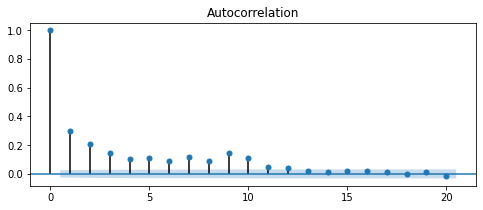

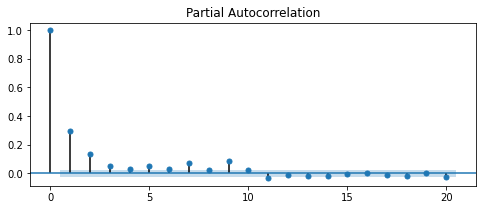

In [13]:
fig, ax = plt.subplots(figsize=(8,3))
plot_acf(data_diff,ax=ax, lags=20);

fig, ax = plt.subplots(figsize=(8,3))
plot_pacf(data_diff,ax=ax, lags=20);

In [14]:
# Import the ARMA module from statsmodels
from statsmodels.tsa.arima_model import ARMA
import statsmodels.api as sm

# Fit an ARMA(2,1) model to the first simulated data
mod_arma = ARMA(data_diff, order=(2,1))
res_arma = mod_arma.fit()

# Print out summary information on the fit
print(res_arma.summary())

# Print out the estimate for the constant and for theta
print(res_arma.params)

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                              ARMA Model Results                              
Dep. Variable:                 Spread   No. Observations:                 5820
Model:                     ARMA(2, 1)   Log Likelihood               12329.158
Method:                       css-mle   S.D. of innovations              0.029
Date:                Mon, 06 Jul 2020   AIC                         -24648.315
Time:                        19:54:07   BIC                         -24614.970
Sample:                             0   HQIC                        -24636.718
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0002      0.001      0.270      0.787      -0.001       0.002
ar.L1.Spread     1.0183      0.035     29.383      0.000       0.950       1.086
ar.L2.Spread    -0.1152      0.020     -5.78

In [15]:
# Plug the optimal parameter values into a new SARIMAX model
ARIMA_MODEL = sm.tsa.statespace.SARIMAX(df, 
                                        order=(1, 1, 1), 
                                        seasonal_order=(0, 0, 0, 2), 
                                        enforce_stationarity=False, 
                                        enforce_invertibility=False)

# Fit the model and print results
output = ARIMA_MODEL.fit()

print(output.summary().tables[1])

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7645      0.005    152.525      0.000       0.755       0.774
ma.L1         -0.5375      0.007    -77.440      0.000      -0.551      -0.524
sigma2         0.0008   3.72e-06    228.130      0.000       0.001       0.001


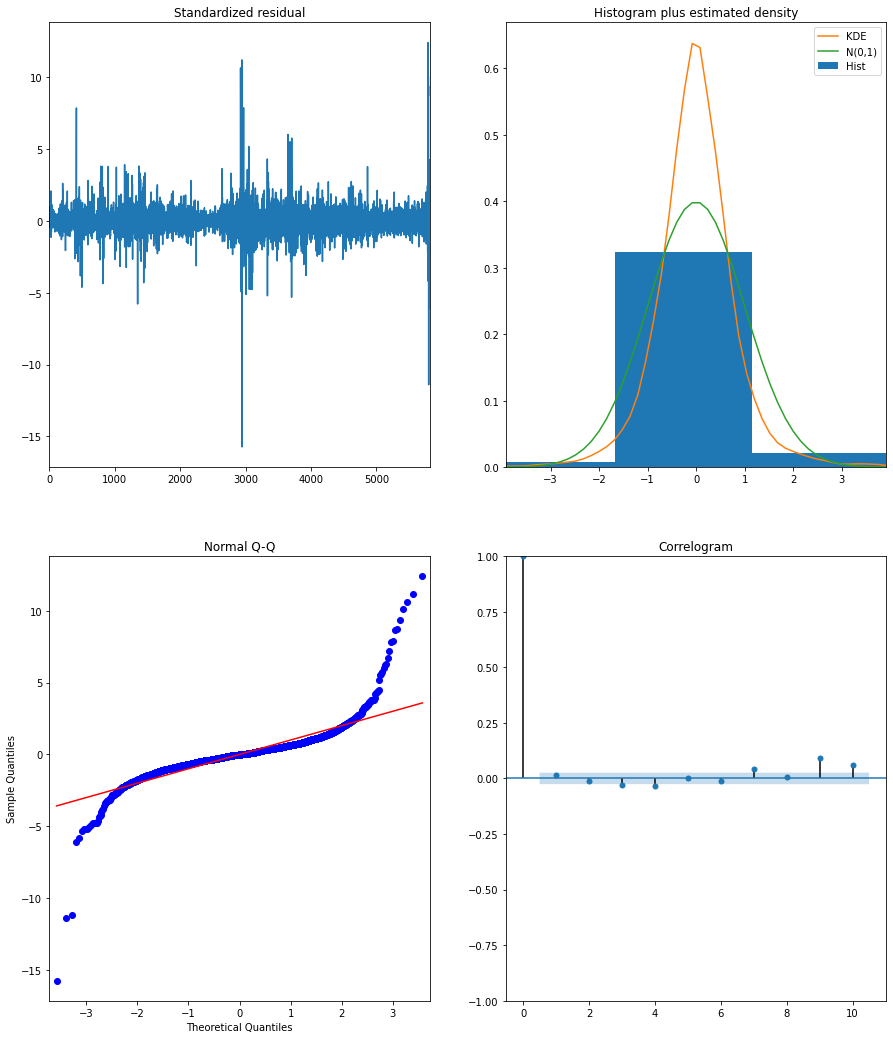

In [16]:
# Call plot_diagnostics() on the results calculated above 
output.plot_diagnostics(figsize=(15, 18))
plt.show()

In [17]:
# Get predictions starting from 01-01-2020 and calculate confidence intervals
pred = output.get_prediction(start=pd.to_datetime('2020-01-02'), dynamic=False)
pred_conf = pred.conf_int()

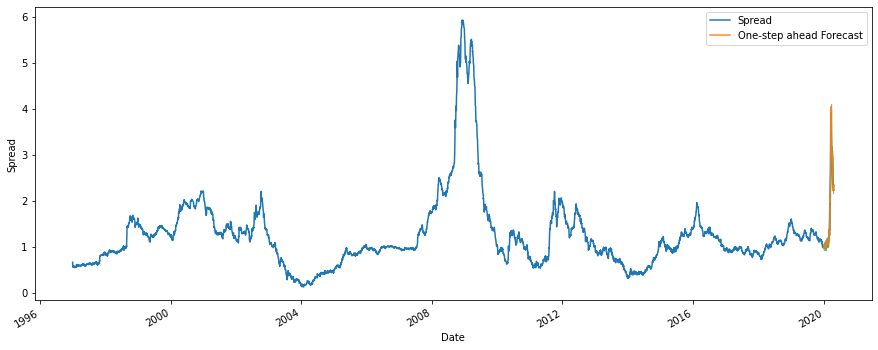

In [18]:
# Plot real vs predicted values along with confidence interval
from matplotlib.pylab import rcParams

rcParams['figure.figsize'] = 15, 6

# Plot observed values
ax = df['1996':].plot(label='observed')

# Plot predicted values
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=0.9)

# Plot the range for confidence intervals
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='g', alpha=0.5)

# Set axes labels
ax.set_xlabel('Date')
ax.set_ylabel('Spread')
plt.legend()

plt.show()

In [19]:
# Get the real and predicted values
spread_forecasted = pred.predicted_mean
spread_truth = df['2020-01-02':]

In [20]:
from sklearn.metrics import mean_squared_error
y_truth = spread_truth
y_forecasted = spread_forecasted
mean_squared_error(y_truth , y_forecasted)

0.011233675660981038

In [21]:
# Plug the optimal parameter values into a new SARIMAX model
ARIMA_MODEL = sm.tsa.statespace.SARIMAX(df, 
                                        order=(1, 1, 1), 
                                        seasonal_order=(0, 0, 0, 2), 
                                        enforce_stationarity=False, 
                                        enforce_invertibility=False)

# Fit the model and print results
output = ARIMA_MODEL.fit()

print(output.summary().tables[1])

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7645      0.005    152.525      0.000       0.755       0.774
ma.L1         -0.5375      0.007    -77.440      0.000      -0.551      -0.524
sigma2         0.0008   3.72e-06    228.130      0.000       0.001       0.001


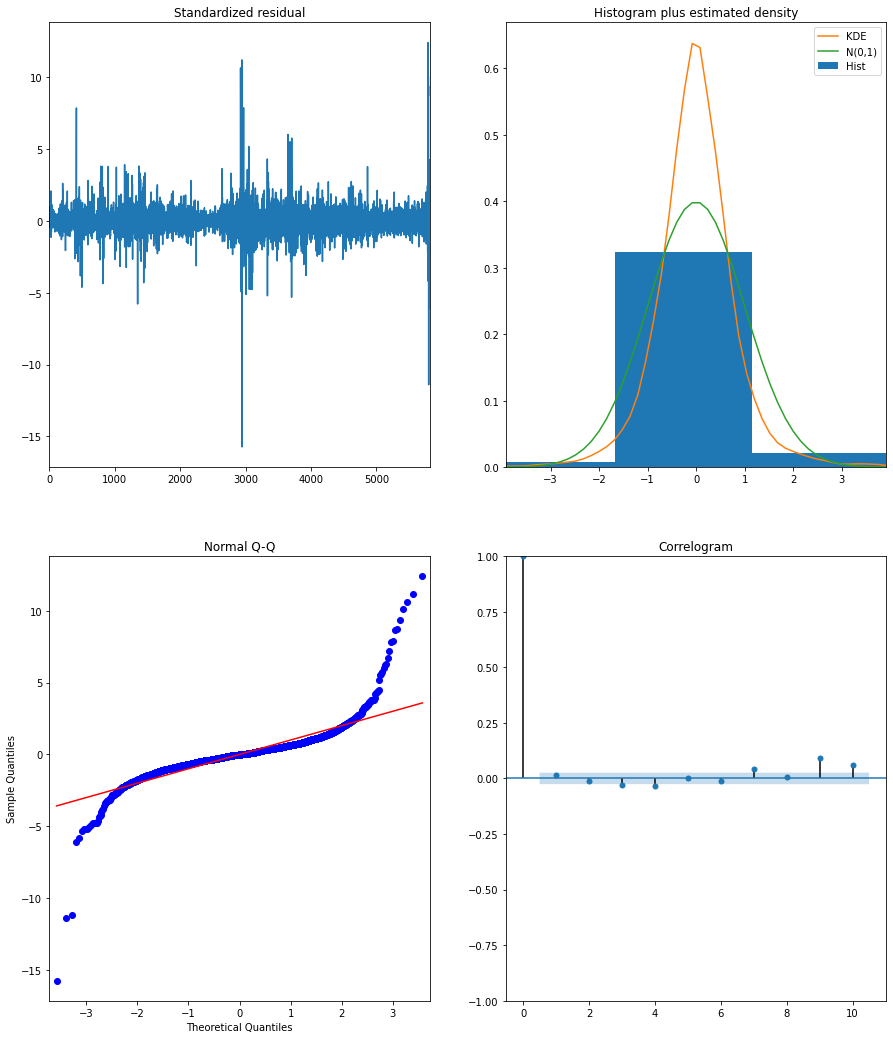

In [22]:
# Call plot_diagnostics() on the results calculated above 
output.plot_diagnostics(figsize=(15, 18))
plt.show()

In [23]:
# Get predictions starting from 01-01-2020 and calculate confidence intervals
pred = output.get_prediction(start=pd.to_datetime('2020-01-02'), dynamic=False)
pred_conf = pred.conf_int()

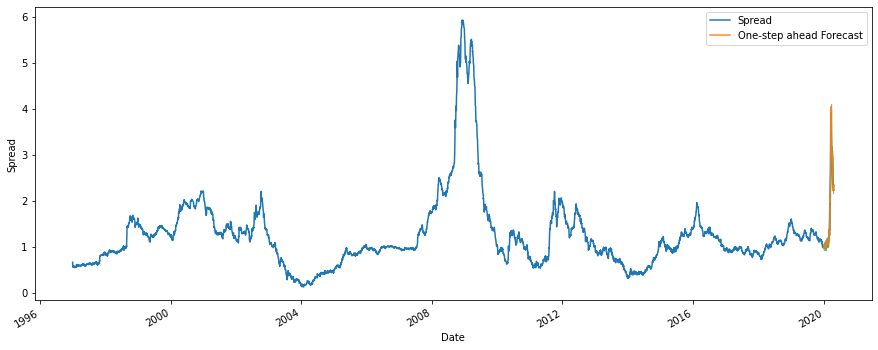

In [24]:
# Plot real vs predicted values along with confidence interval
from matplotlib.pylab import rcParams

rcParams['figure.figsize'] = 15, 6

# Plot observed values
ax = df['1996':].plot(label='observed')

# Plot predicted values
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=0.9)

# Plot the range for confidence intervals
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='g', alpha=0.5)

# Set axes labels
ax.set_xlabel('Date')
ax.set_ylabel('Spread')
plt.legend()

plt.show()

In [25]:
## Get the real and predicted values
spread_forecasted = pred.predicted_mean
spread_truth = df['2020-01-02':'2020-04-21']

In [26]:
y_truth = spread_truth
y_forecasted = spread_forecasted
mean_squared_error(y_truth , y_forecasted)

0.011233675660981038

In [53]:
# Plug the optimal parameter values into a new SARIMAX model
ARIMA_MODEL_2 = sm.tsa.statespace.SARIMAX(df, 
                                        order=(1, 1, 1), 
                                        seasonal_order=(0, 0, 0, 2), 
                                        enforce_stationarity=False, 
                                        enforce_invertibility=False)

# Fit the model and print results
output_2 = ARIMA_MODEL_2.fit()

print(output_2.summary().tables[1])

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7645      0.005    152.525      0.000       0.755       0.774
ma.L1         -0.5375      0.007    -77.440      0.000      -0.551      -0.524
sigma2         0.0008   3.72e-06    228.130      0.000       0.001       0.001


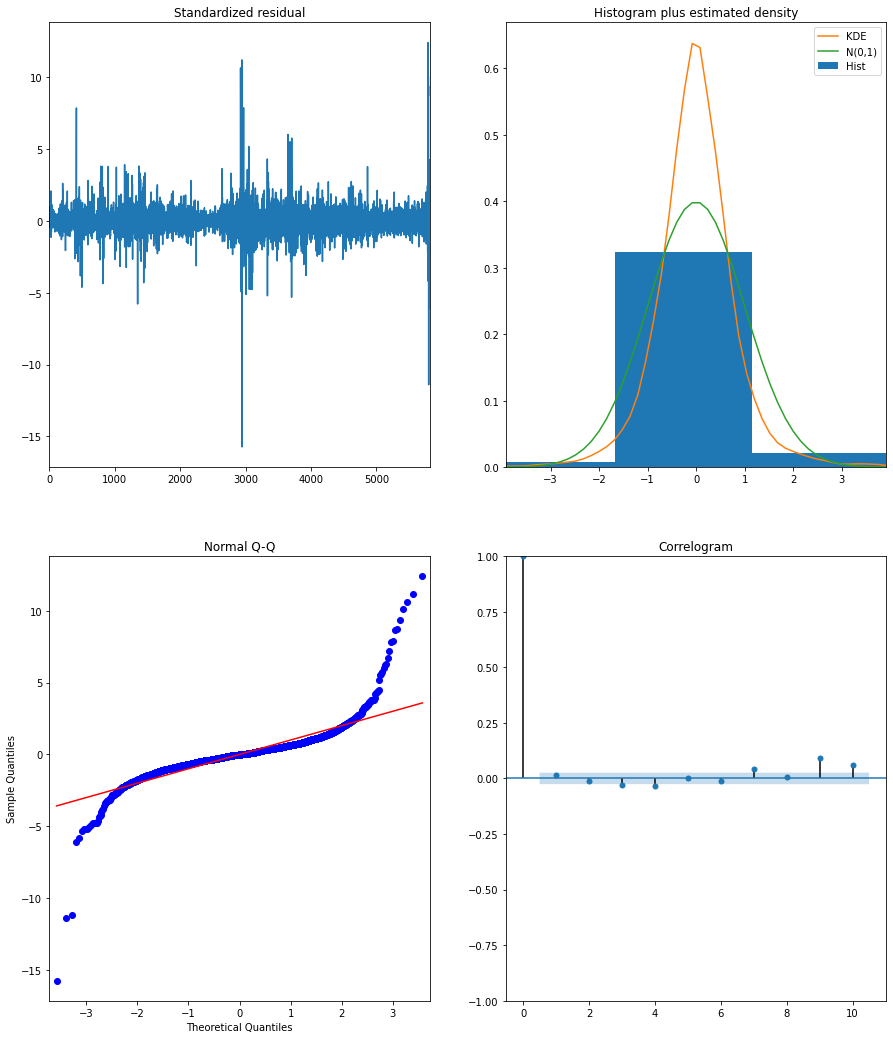

In [54]:
# Call plot_diagnostics() on the results calculated above 
output_2.plot_diagnostics(figsize=(15, 18))
plt.show()

In [55]:
# Get predictions starting from 01-01-2020 and calculate confidence intervals
pred = output_2.get_prediction(start=pd.to_datetime('2020-01-02'), dynamic=False)
pred_conf = pred.conf_int()

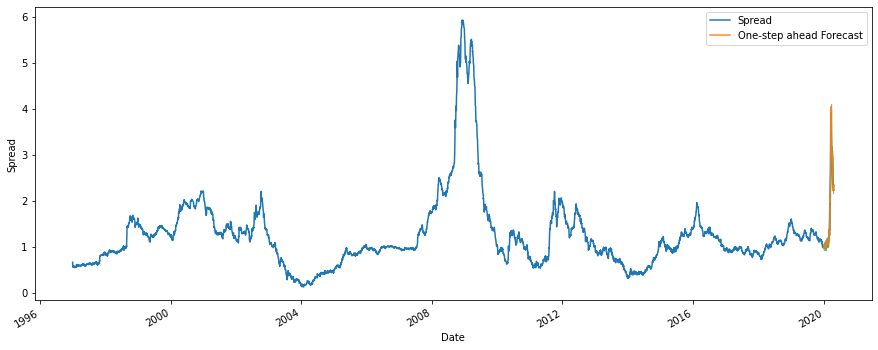

In [56]:
# Plot real vs predicted values along with confidence interval
from matplotlib.pylab import rcParams

rcParams['figure.figsize'] = 15, 6

# Plot observed values
ax = df['1996':].plot(label='observed')

# Plot predicted values
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=0.9)

# Plot the range for confidence intervals
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='g', alpha=0.5)

# Set axes labels
ax.set_xlabel('Date')
ax.set_ylabel('Spread')
plt.legend()

plt.show()

In [57]:
## Get the real and predicted values
spread_forecasted = pred.predicted_mean
spread_truth = df['2020-01-02':]

In [58]:
spread_forecasted

Date
2020-01-02    0.979560
2020-01-03    1.004303
2020-01-06    1.026853
2020-01-07    1.048224
2020-01-08    1.032151
                ...   
2020-04-14    2.304272
2020-04-15    2.216593
2020-04-16    2.319537
2020-04-17    2.316731
2020-04-20    2.286057
Length: 75, dtype: float64

In [59]:
y_truth = spread_truth
y_forecasted = spread_forecasted
mean_squared_error(y_truth , y_forecasted)

0.011233675660981038

In [72]:
forecast_1= output.forecast(steps=5)
forecast_1

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


5821    2.317045
5822    2.314787
5823    2.313060
5824    2.311739
5825    2.310730
dtype: float64

In [73]:
forecast_2 = output.forecast(steps=30)
forecast_2

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


5821    2.317045
5822    2.314787
5823    2.313060
5824    2.311739
5825    2.310730
5826    2.309958
5827    2.309368
5828    2.308917
5829    2.308572
5830    2.308308
5831    2.308107
5832    2.307953
5833    2.307835
5834    2.307745
5835    2.307676
5836    2.307623
5837    2.307583
5838    2.307552
5839    2.307529
5840    2.307511
5841    2.307497
5842    2.307486
5843    2.307478
5844    2.307472
5845    2.307468
5846    2.307464
5847    2.307461
5848    2.307459
5849    2.307458
5850    2.307456
dtype: float64

In [74]:
forecast_3 = output.forecast(steps=60)
forecast_3

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


5821    2.317045
5822    2.314787
5823    2.313060
5824    2.311739
5825    2.310730
5826    2.309958
5827    2.309368
5828    2.308917
5829    2.308572
5830    2.308308
5831    2.308107
5832    2.307953
5833    2.307835
5834    2.307745
5835    2.307676
5836    2.307623
5837    2.307583
5838    2.307552
5839    2.307529
5840    2.307511
5841    2.307497
5842    2.307486
5843    2.307478
5844    2.307472
5845    2.307468
5846    2.307464
5847    2.307461
5848    2.307459
5849    2.307458
5850    2.307456
5851    2.307455
5852    2.307455
5853    2.307454
5854    2.307454
5855    2.307453
5856    2.307453
5857    2.307453
5858    2.307453
5859    2.307453
5860    2.307453
5861    2.307453
5862    2.307452
5863    2.307452
5864    2.307452
5865    2.307452
5866    2.307452
5867    2.307452
5868    2.307452
5869    2.307452
5870    2.307452
5871    2.307452
5872    2.307452
5873    2.307452
5874    2.307452
5875    2.307452
5876    2.307452
5877    2.307452
5878    2.307452
5879    2.3074

In [75]:
forecast_4 = output.forecast(steps=90)
forecast_4

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


5821    2.317045
5822    2.314787
5823    2.313060
5824    2.311739
5825    2.310730
          ...   
5906    2.307452
5907    2.307452
5908    2.307452
5909    2.307452
5910    2.307452
Length: 90, dtype: float64

In [76]:
forecast_5 = output.forecast(steps=120)
forecast_5

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


5821    2.317045
5822    2.314787
5823    2.313060
5824    2.311739
5825    2.310730
          ...   
5936    2.307452
5937    2.307452
5938    2.307452
5939    2.307452
5940    2.307452
Length: 120, dtype: float64

In [77]:
# forecast_1.to_csv('5_days.csv')
# forecast_2.to_csv('30_days.csv')
# forecast_3.to_csv('60_days.csv')
# forecast_4.to_csv('90_days.csv')
# forecast_5.to_csv('120_days.csv')

In [63]:
# forecast_1= output_2.forecast(steps=5)
# forecast_1

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


5821    2.317045
5822    2.314787
5823    2.313060
5824    2.311739
5825    2.310730
dtype: float64

In [64]:
# forecast_2 = output_2.forecast(steps=90)
# forecast_2

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


5821    2.317045
5822    2.314787
5823    2.313060
5824    2.311739
5825    2.310730
          ...   
5906    2.307452
5907    2.307452
5908    2.307452
5909    2.307452
5910    2.307452
Length: 90, dtype: float64

In [65]:
# forecast_3 = output_2.forecast(steps=120)
# forecast_3

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


5821    2.317045
5822    2.314787
5823    2.313060
5824    2.311739
5825    2.310730
          ...   
5936    2.307452
5937    2.307452
5938    2.307452
5939    2.307452
5940    2.307452
Length: 120, dtype: float64